<a href="https://colab.research.google.com/github/tegerte/1/blob/main/mnist2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn.palettes import color_palette
import seaborn as sb

import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import tensorflow as tf


from keras.datasets import mnist
import random

import requests
from PIL import Image
import cv2



In [8]:
sb.set_theme(style="darkgrid")
np.random.seed(0)
num_f_samples = []
cols = 10
num_classes = 10

sb.set_theme(style="darkgrid")
#  Learning rate
LR=0.01
n_pts=500
# Nmber of epochs
EP=10
#Batch size
BS=200
#  Validation split
VS=0.1

In [9]:
def plot_controlgraphs(hist, incl_validation = False):
  plt.plot(hist.history['accuracy'],label='accuracy')
  plt.plot(hist.history['loss'],label='loss')
  if incl_validation:
    plt.plot(hist.history['val_loss'],label='val_loss')
    plt.plot(hist.history['val_accuracy'],label='val_acc')
  plt.title(str('accuracy and loss'))
  plt.xlabel('epochs')
  plt.legend()
  plt.show()

In [10]:
(X_train, y_train),(X_test, y_test_raw) = mnist.load_data()

In [11]:
print(X_train.shape)

(60000, 28, 28)


In [12]:
assert(X_train.shape[0] == y_train.shape[0]), 'Not all samples are labelled!'
assert(X_test.shape[0] == y_test_raw.shape[0]), 'Not all samples are labelled!'
assert(X_train.shape[1:] == (28,28)), 'image dimensions not correct!'
assert(X_test.shape[1:] == (28,28)), 'image dimensions not correct!'

In [13]:
X_train.shape[1:]==(28,28)

True

In [14]:
num_f_samples = {}
#fig, ax = plt.subplots(nrows=num_classes, ncols=cols, figsize=(12,12))
#fig.tight_layout()

for i in range(cols):
  for j in range(num_classes):
    x_sel = X_train[y_train==j]
    # ax[j][i].axis('off')
    # ax[j][i].imshow(x_sel[random.randint(0,len(x_sel-1)),:,:], cmap='Greys')
    if i ==2:
      num_f_samples[j]=(len(x_sel))
    
   

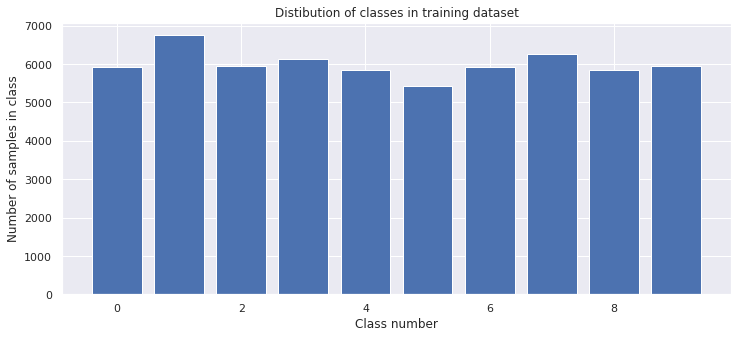

In [15]:
plt.figure(figsize=(12,5))
#plt.bar(num_f_samples.keys(), num_f_samples.values())
plt.bar(*zip(*num_f_samples.items()))
plt.xlabel('Class number')
plt.ylabel('Number of samples in class')
plt.title('Distibution of classes in training dataset');

In [16]:
print(*zip(*num_f_samples.items()))

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9) (5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949)


In [17]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test_raw, num_classes)
#normalizing to 0-1 value range
X_train = X_train/255
X_test = X_test/255
# flatten so matrix multilication is possible:
num_pix= X_train.shape[1]*X_train.shape[2]
X_train  =  X_train.reshape(X_train.shape[0], num_pix)
X_test  =  X_test.reshape(X_test.shape[0], num_pix)
print(X_train.shape)

(60000, 784)


In [18]:
def create_model():
  model=Sequential()
  model.add(Dense(units=10,input_dim=num_pix,activation='relu'))
  model.add(Dense(units=30,activation='relu'))
  model.add(Dense(units=10,activation='relu'))
  model.add(Dense(units=num_classes,activation='softmax'))
  model.compile(Adam(learning_rate=LR) ,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [19]:
model=create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/10
270/270 [==============================] - 2s 4ms/step - loss: 0.5335 - accuracy: 0.8334 - val_loss: 0.2282 - val_accuracy: 0.9300
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2785 - accuracy: 0.9175 - val_loss: 0.2132 - val_accuracy: 0.9372
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2508 - accuracy: 0.9265 - val_loss: 0.2306 - val_accuracy: 0.9333
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2278 - accuracy: 0.9333 - val_loss: 0.1887 - val_accuracy: 0.9468
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2213 - accuracy: 0.9343 - val_loss: 0.1855 - val_accuracy: 0.9443
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2141 - accuracy: 0.9367 - val_loss: 0.1899 - val_accuracy: 0.9458
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2056 - accuracy: 0.9383 - val_loss: 0.1909 - val_accuracy: 0.9443
Epoch 

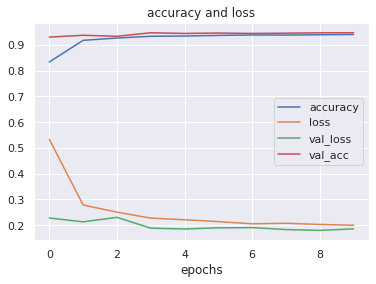

In [20]:
h=model.fit(x = X_train,y = y_train,validation_split = VS,
            verbose=1,
            batch_size = BS,
            epochs = EP,
            shuffle = 'true')
plot_controlgraphs(h, incl_validation=True)

In [ ]:
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-5.png'
response = requests.get(url, stream=True)
img_raw = Image.open(response.raw)
plt.imshow(img_raw, cmap=plt.get_cmap('gray'));

In [22]:
img_arr = np.asarray(img_raw)
img_res = cv2.resize(img_arr, (28, 28))
img_gs = cv2.cvtColor(img_res, cv2.COLOR_BGR2GRAY)
img_rev = cv2.bitwise_not(img_gs)
#plt.imshow(img, cmap=plt.get_cmap('gray'))

img_norm = img_rev/255
img_reshape = img_norm.reshape(1, 784)

prediction = np.argmax(model.predict(img_reshape), axis=-1)
print(f'prediction for input is:{str(prediction)}')

prediction for input is:[5]


In [23]:
# y_pred = model.predict(X_test)
# y_pred_labels= [np.argmax(i) for i in y_pred]
# #print(y_test[:5])
# cm = tf.math.confusion_matrix(labels=y_test_raw, predictions=y_pred_labels)
# plt.figure(figsize=(10,7))
# sb.heatmap(cm,annot=True, fmt='d');
# plt.xlabel('predicted')
# plt.ylabel('real')